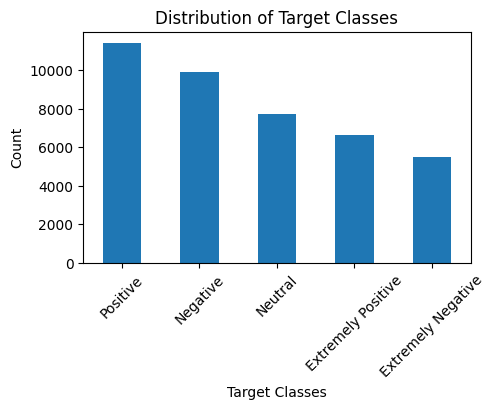

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding='latin-1')

target_class_counts = df['Sentiment'].value_counts()

# Plotting the distribution of target classes
plt.figure(figsize=(5, 3))
target_class_counts.plot(kind='bar')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

This dataset should be able to determine the sentiment of a users tweet, and assign it to either "Negative, Positive, Neutral, Extremely Positive, or Extremely Negative". Our data consists of user data, tweets, and sentiment.

https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding='latin-1') # Replace "your_file.csv" with the path to your CSV file


X = df.drop(columns=['Sentiment', 'UserName', 'Location', 'ScreenName', 'TweetAt'])  # Features (Remove frivilous features)
y = df['Sentiment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_encoded, y_train)
nb_pred = nb_model.predict(X_test_encoded)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)

# Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_encoded, y_train)
lr_pred = lr_model.predict(X_test_encoded)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

# Neural Networks
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train_encoded, y_train)
nn_pred = nn_model.predict(X_test_encoded)
nn_accuracy = accuracy_score(y_test, nn_pred)
print("Neural Networks Accuracy:", nn_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Naïve Bayes Accuracy: 0.1282798833819242
Logistic Regression Accuracy: 0.27781827016520894
Neural Networks Accuracy: 0.27781827016520894


Working with all features:

Naïve Bayes Accuracy: 0.18157894736842106

Logistic Regression Accuracy: 0.2657894736842105

Neural Networks Accuracy: 0.2381578947368421

In this case, logistic regression delivers the most accurately. This comes as a surprise as generally neural netoworks would be expected to be more accuate for a classification problem. I felt something was off at this point, and decided to remoove some feaures such as tweet location, and user name, to help reduce error from feautres that would obviously not contribute to our target.

Once all but the tweet itself had been removed from features, the results changed to:

Naïve Bayes Accuracy: 0.17105263157894737

Logistic Regression Accuracy: 0.2789473684210526

Neural Networks Accuracy: 0.2789473684210526

The Neural Network and the Logistic Regression accuracy had the exact same accuracy, which indicated the data was linearly seperable. Naive Bayes not being able to interpret context of words for example, and just seeing the tweet as a 'bag of words' resulted in a lower accuracy, which comes at no surprise. The Neural Network also worked maybe 3x as fast. At this point I reduced the number of max iterations for both regression and neural nets, and saw no change in accuracy.

